This is the code to access gridded data from Custom weather over India

In [2]:
#Import Statements
import requests
import netCDF4
from netCDF4 import Dataset

In [3]:
#Parameters
lon_min = "68"
lat_min = "6"
lon_max = "97"
lat_max = "37"
grid_url = "https://cws.customweather.com/netcdf?client=&client_password=76N4gH38tm&layer=gfs0p25:maxtemp:2m&init_time=latest&forecast_hour=3&BBOX=68,6,97,37&WIDTH=1200" # Downloads netcdf file

In [32]:
file_path = "C:\\Users\\Sandhya Rani\\Downloads\\last_India_7_4_2024_cw"
nc_data = Dataset(file_path,'r')
nc_data.variables

{'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: Longitude
 unlimited dimensions: 
 current shape = (1200,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     long_name: Latitude
 unlimited dimensions: 
 current shape = (1282,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lev': <class 'netCDF4._netCDF4.Variable'>
 float32 lev(lev)
     units: n/a
     long_name: Level
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: seconds
     long_name: unix time seconds since epoch
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of -2147483647 used,
 'era_hourly_obs:maxtemp:2m': <class 'netCDF4._netCDF4.Variable'>
 float32 era_hourly_obs:maxtemp:2m(time, lev, l

In [33]:
for var in nc_data.variables:
    print(var)

lon
lat
lev
time
era_hourly_obs:maxtemp:2m


In [44]:
import xarray as xr
dataset = xr.open_dataset(file_path)

In [35]:
dataframe = dataset.to_dataframe()

In [36]:
dataframe

era_hourly_obs:maxtemp:2m
lon      lat       lev time                                          
68.00000 36.981667 0.0 19941 days 09:38:37                  30.454863
         36.957500 0.0 19941 days 09:38:37                  30.193748
         36.933334 0.0 19941 days 09:38:37                  29.932636
         36.909168 0.0 19941 days 09:38:37                  29.671522
         36.884998 0.0 19941 days 09:38:37                  29.410410
...                                                               ...
96.97583 6.120833  0.0 19941 days 09:38:37                  28.845354
         6.096667  0.0 19941 days 09:38:37                  28.859720
         6.072500  0.0 19941 days 09:38:37                  28.874086
         6.048333  0.0 19941 days 09:38:37                  28.888454
         6.024167  0.0 19941 days 09:38:37                  28.902821

[1538400 rows x 1 columns]

In [46]:
import pandas as pd
df_flat = dataframe.reset_index()
# df_flat.rename(columns={"gfs0p25:maxtemp:2m":"maxtemp"})
df_flat.head(30)
df_flat
# df_flat['time'] = pd.to_datetime(df_flat['time'])


,lon,lat,lev,time,era_hourly_obs:maxtemp:2m
0,68.00000,36.981667,0.0,19941 days 09:38:37,30.454863
1,68.00000,36.957500,0.0,19941 days 09:38:37,30.193748
2,68.00000,36.933334,0.0,19941 days 09:38:37,29.932636
3,68.00000,36.909168,0.0,19941 days 09:38:37,29.671522
4,68.00000,36.884998,0.0,19941 days 09:38:37,29.410410
...,...,...,...,...,...
1538395,96.97583,6.120833,0.0,19941 days 09:38:37,28.845354
1538396,96.97583,6.096667,0.0,19941 days 09:38:37,28.859720
1538397,96.97583,6.072500,0.0,19941 days 09:38:37,28.874086
1538398,96.97583,6.048333,0.0,19941 days 09:38:37,28.888454


In [50]:
# df_flat.columns.rename("gfs0p25:mintemp:2m","mintemp")
df_flat
# df_day = df_flat[df_flat["time"] == "2024-02-07 00:00:00+00:00"]
# agg_df = df_flat.groupby(['lat', 'lon'])['gfs0p25:maxtemp:2m'].mean().reset_index()

,lon,lat,lev,time,era_hourly_obs:maxtemp:2m
0,68.00000,36.981667,0.0,19941 days 09:38:37,30.454863
1,68.00000,36.957500,0.0,19941 days 09:38:37,30.193748
2,68.00000,36.933334,0.0,19941 days 09:38:37,29.932636
3,68.00000,36.909168,0.0,19941 days 09:38:37,29.671522
4,68.00000,36.884998,0.0,19941 days 09:38:37,29.410410
...,...,...,...,...,...
1538395,96.97583,6.120833,0.0,19941 days 09:38:37,28.845354
1538396,96.97583,6.096667,0.0,19941 days 09:38:37,28.859720
1538397,96.97583,6.072500,0.0,19941 days 09:38:37,28.874086
1538398,96.97583,6.048333,0.0,19941 days 09:38:37,28.888454


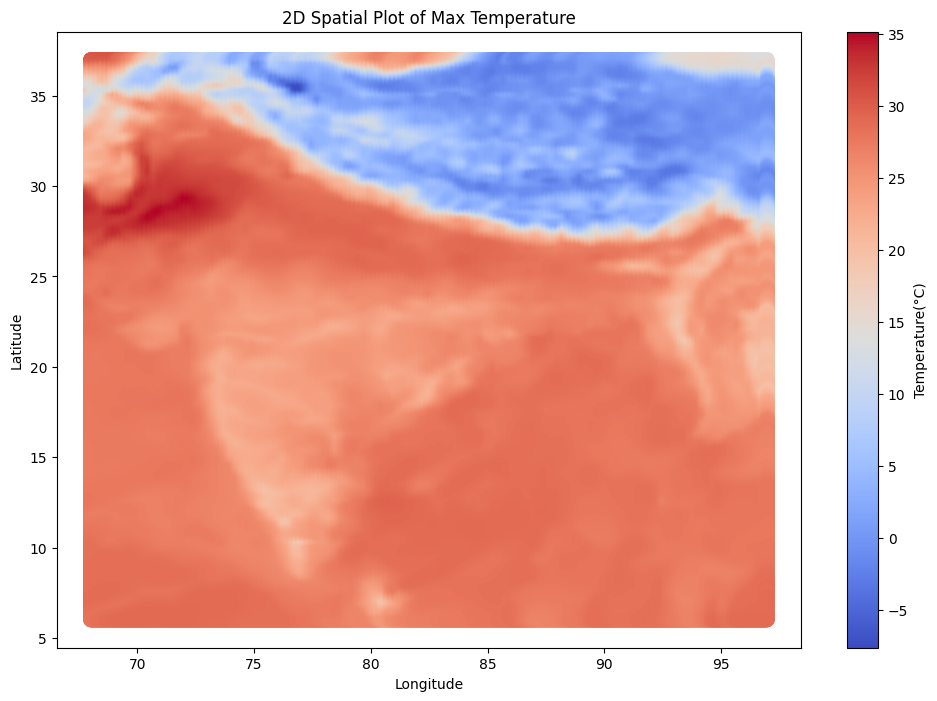

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot using Pandas' plot method
scatter = df_flat.plot(
    kind='scatter', x='lon', y='lat', c='era_hourly_obs:maxtemp:2m', colormap="coolwarm", colorbar="True", s=100, ax=ax
)


plt.title('2D Spatial Plot of Max Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gcf().get_axes()[1].set_ylabel("Temperature(°C)")
plt.savefig("India_MaxTemp.png")
plt.show()